In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

Source Data:https://dasl.datadescription.com/datafile/housing-prices-ge19/?_sfm_methods=Multiple+Regression&_sfm_cases=4+59943&sf_paged=2

# Zillow House Prices and Living Area

In [28]:
data = pd.read_csv("C:\\Users\\Imy Hull\\Desktop\Datasets_ml\housing-prices-ge19.csv")

In [30]:
data.head()

,Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Fuel.Type,Heat.Type,Sewer.Type,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms,Test
0,132500,0.09,0,42,50000,0,0,Electric,Electric,Private,906,35,2,1,1.0,5,0
1,181115,0.92,0,0,22300,0,0,Gas,Hot Water,Private,1953,51,3,0,2.5,6,1
2,109000,0.19,0,133,7300,0,0,Gas,Hot Water,Public,1944,51,4,1,1.0,8,1
3,155000,0.41,0,13,18700,0,0,Gas,Hot Air,Private,1944,51,3,1,1.5,5,0
4,86060,0.11,0,0,15000,1,1,Gas,Hot Air,Public,840,51,2,0,1.0,3,0


In [100]:
data["Price"].isnull().sum()

0

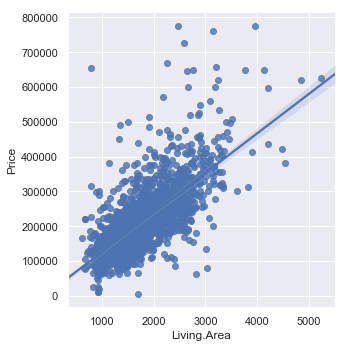

In [134]:
ax = sns.lmplot(x ='Living.Area', y ='Price', data = data) 

In [138]:
# Correlation between living area and price
data["Living.Area"].corr(data["Price"])

0.7134854679279262

In [139]:
X = data[["Living.Area"]]
y = data["Price"]

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [142]:
len(X_train)

1387

In [143]:
len(X_test)

347

In [144]:
model = LinearRegression()
model = model.fit(X_train,y_train)

In [145]:
model.score(X_test,y_test)

0.45488974859877485

In [146]:
model.coef_

array([113.1525016])

In [147]:
model.intercept_

13253.905444900709

In [148]:
# Predict price of a home with area = 5000 sqr ft

In [149]:
pred_1 = model.predict([[5000]])
print(pred_1)

[579016.41343491]


In [150]:
y_pred = model.predict(X_test)

In [170]:
compare = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
compare.head(10)

,Actual,Predicted
86,185000,82019.075777
47,138000,176785.931370
668,325000,177107.872735
753,127000,112023.031694
1415,189500,184905.064884
331,249900,270808.985832
1293,136000,142364.985233
660,165000,154269.969746
1337,225000,213261.752070
162,174000,238921.555559


# Multiple Linear Regression 

In [152]:
data.head()

,Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Fuel.Type,Heat.Type,Sewer.Type,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms,Test
0,132500,0.09,0,42,50000,0,0,Electric,Electric,Private,906,35,2,1,1.0,5,0
1,181115,0.92,0,0,22300,0,0,Gas,Hot Water,Private,1953,51,3,0,2.5,6,1
2,109000,0.19,0,133,7300,0,0,Gas,Hot Water,Public,1944,51,4,1,1.0,8,1
3,155000,0.41,0,13,18700,0,0,Gas,Hot Air,Private,1944,51,3,1,1.5,5,0
4,86060,0.11,0,0,15000,1,1,Gas,Hot Air,Public,840,51,2,0,1.0,3,0


In [153]:
data.isnull().any()

Price            False
Lot.Size         False
Waterfront       False
Age              False
Land.Value       False
New.Construct    False
Central.Air      False
Fuel.Type        False
Heat.Type        False
Sewer.Type       False
Living.Area      False
Pct.College      False
Bedrooms         False
Fireplaces       False
Bathrooms        False
Rooms            False
Test             False
dtype: bool

In [174]:
X = data[["Living.Area","Bedrooms","Age"]]
y = data["Price"]

In [175]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [176]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [177]:
model.coef_

array([   128.06073762, -14327.2732437 ,    -58.91124913])

In [178]:
model.intercept_

35833.80254195261

In [179]:
model.score(X_test,y_test)

0.509283246895802

In [183]:
# Predict for 2000 ft, 4 bedrooms and 15 years old
model.predict([[2000,4,15]])

array([233762.51606854])

In [184]:
# Check
35833.80254195261+ 128.06073762*2000-14327.2732437*4-58.91124913*15

233762.51607020263

In [180]:
y_pred2 = model.predict(X_test)

In [181]:
compare2 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred2})
compare2.head(10)

,Actual,Predicted
537,322277,279905.245304
362,415000,408022.465250
1436,149000,183482.975173
1579,320000,259850.989959
1324,174000,149664.702202
30,130000,160408.882244
1554,268000,251880.509509
140,135000,354781.934831
968,101000,116484.303997
941,126000,172912.845199


# Interview and Salaries Example

Source:Codebasics
https://www.youtube.com/watch?v=J_LnPL3Qg70

In [246]:
from word2number import w2n
from sklearn import linear_model

In [237]:
df = pd.read_csv("C:\\Users\\Imy Hull\\Desktop\Datasets_ml\hiring.csv")

In [238]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [239]:
df.experience = df.experience.fillna("zero")
df.experience = df.experience.apply(w2n.word_to_num)

In [240]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [241]:
mean_score = df["test_score(out of 10)"].mean()

In [242]:
mean_score = round(mean_score)
mean_score

8

In [243]:
df["test_score(out of 10)"] = df["test_score(out of 10)"].fillna(mean_score)

In [244]:
df.head(10)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [247]:
reg = linear_model.LinearRegression()

In [250]:
X = df[["experience","test_score(out of 10)","interview_score(out of 10)"]]
y = df["salary($)"]

In [251]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [252]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [253]:
model.coef_

array([2907.91599354, 3096.5266559 , 1961.63166397])

In [254]:
model.intercept_

8283.52180936998

In [256]:
# test the model
model.predict([[2,9,6]])

array([53737.88368336])

In [257]:
model.predict([[12,10,10]])

array([93760.09693053])